In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r'C:\Users\HP\Desktop\CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:title={'center':'box plot'}, xlabel='price'>

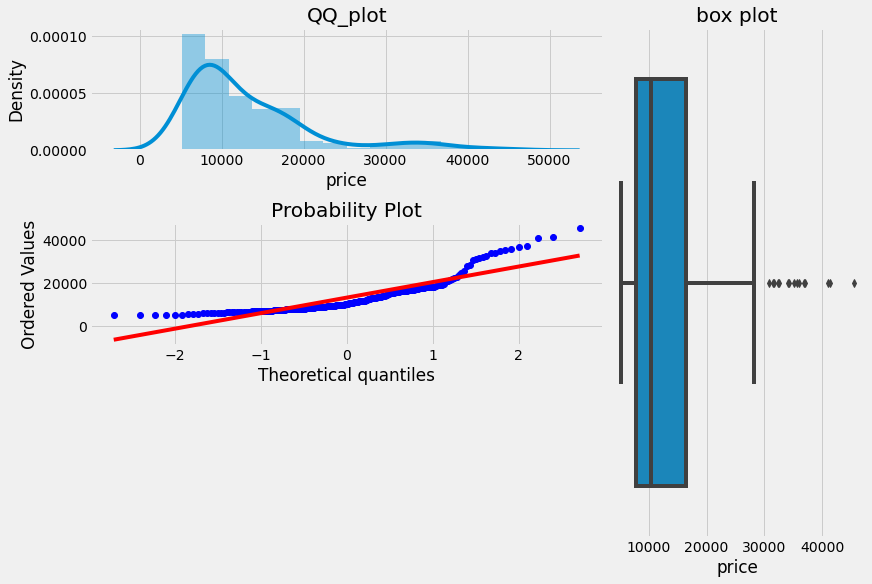

In [7]:
 import matplotlib.style as style
style.use('fivethirtyeight')
fig=plt.figure(constrained_layout=True,figsize=(12,8))
grid=gridspec.GridSpec(ncols=3,nrows=3,figure=fig)

ax1=fig.add_subplot(grid[0,:2])
ax1.set_title('Histogram')
sns.distplot(data.loc[:,'price'],norm_hist=True,ax=ax1)

ax2=fig.add_subplot(grid[1,:2])
ax1.set_title('QQ_plot')
stats.probplot(data.loc[:,'price'],plot=ax2);

ax3=fig.add_subplot(grid[:,2])
ax3.set_title('box plot')
sns.boxplot(data.loc[:,'price'],ax=ax3,orient='v')

In [8]:
(data.corr())['price'].sort_values(ascending=False)[1:]

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

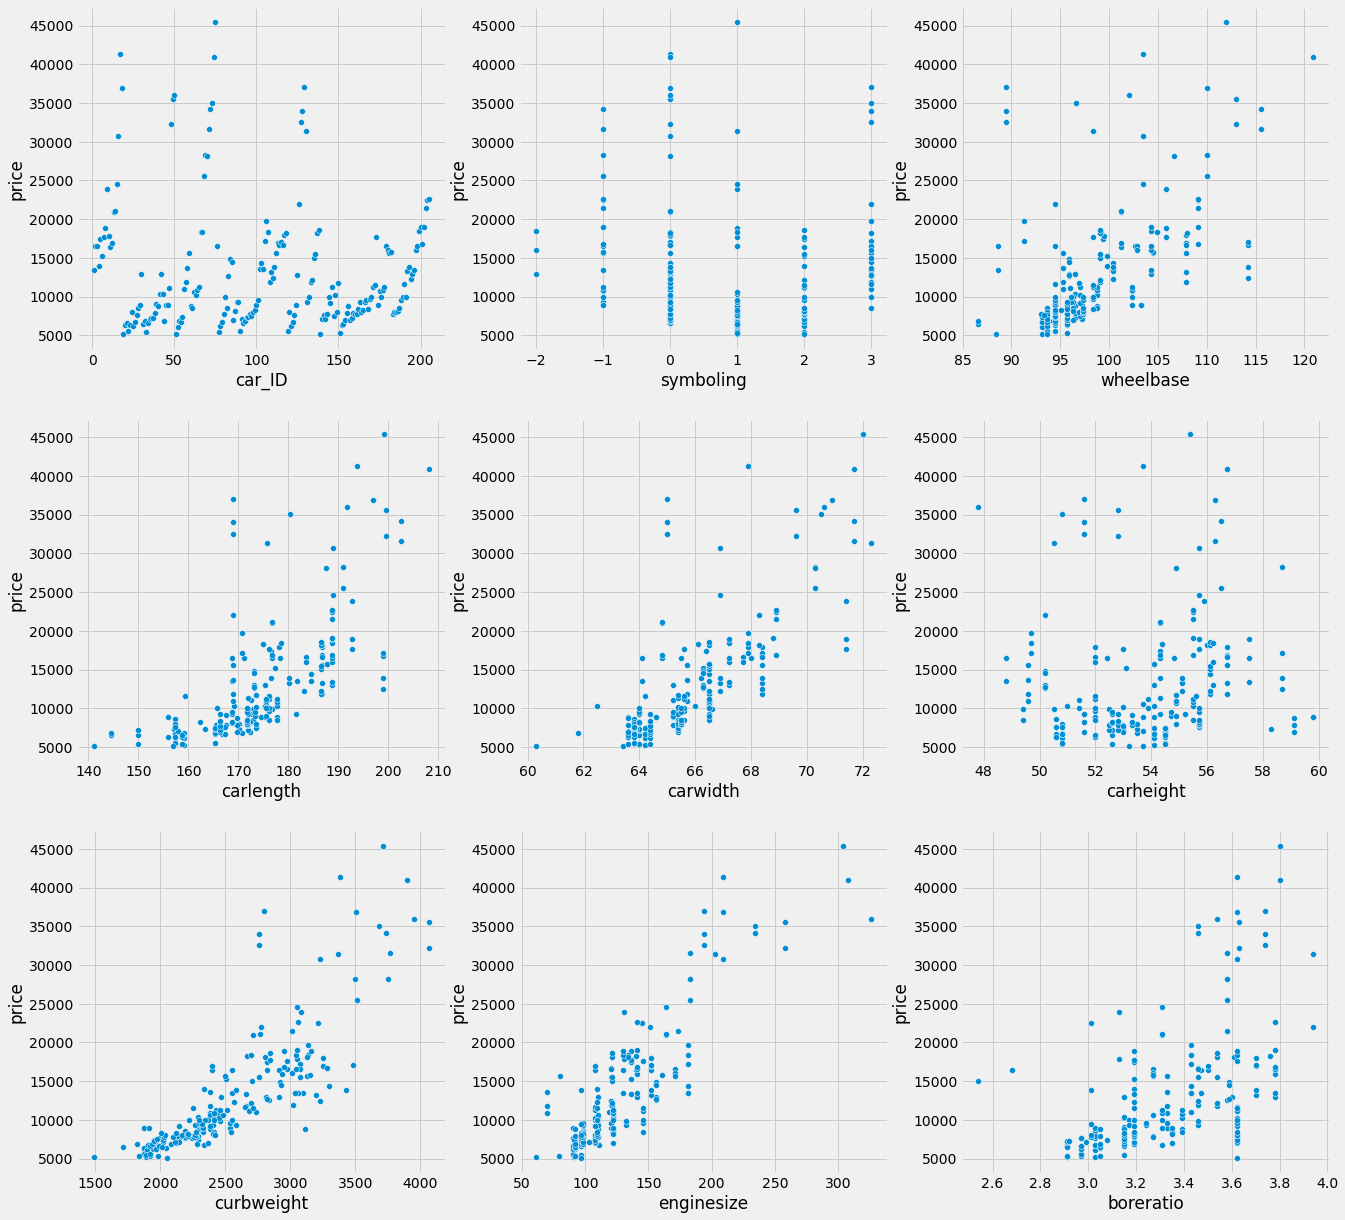

In [9]:
high_corr_fe=data.corr().index
high_corr_fe=high_corr_fe.drop('price')

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
k=0
for i in range(3) :
     for j in range(3):
          sns.scatterplot(high_corr_fe[k],'price',data=data,ax=axs[i][j])
          k=k+1
        

In [10]:
data.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [11]:
ds=data.copy()
X=data.drop(['car_ID','CarName','price'],axis=1).reset_index(drop=True)
y=data.price
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=48)

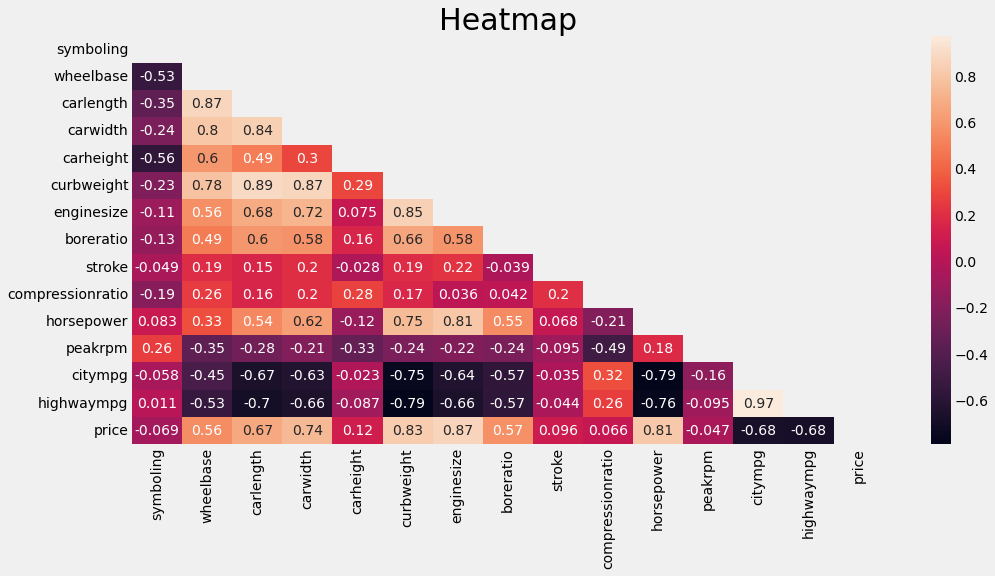

In [12]:
train=pd.concat([x_train,y_train],axis=1)
test=pd.concat([x_test,y_test],axis=1)

plt.figure(figsize=(15,7))
mask=np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(train.corr(),mask=mask,annot=True)
plt.title("Heatmap", fontsize = 30);

<h2>fixing skewness

In [13]:
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

num_cols=X.dtypes[X.dtypes!='object'].index

skewed_feats=X[num_cols].apply(lambda x:skew(x)).sort_values(ascending=False)

skewed_feats



high_skew=skewed_feats[abs(skewed_feats>.5)].index
for i in high_skew :
    X[i]=boxcox1p(X[i],boxcox_normmax(X[i]+1))

In [14]:
y_train=np.log1p(y_train)

<AxesSubplot:title={'center':'box plot'}, xlabel='price'>

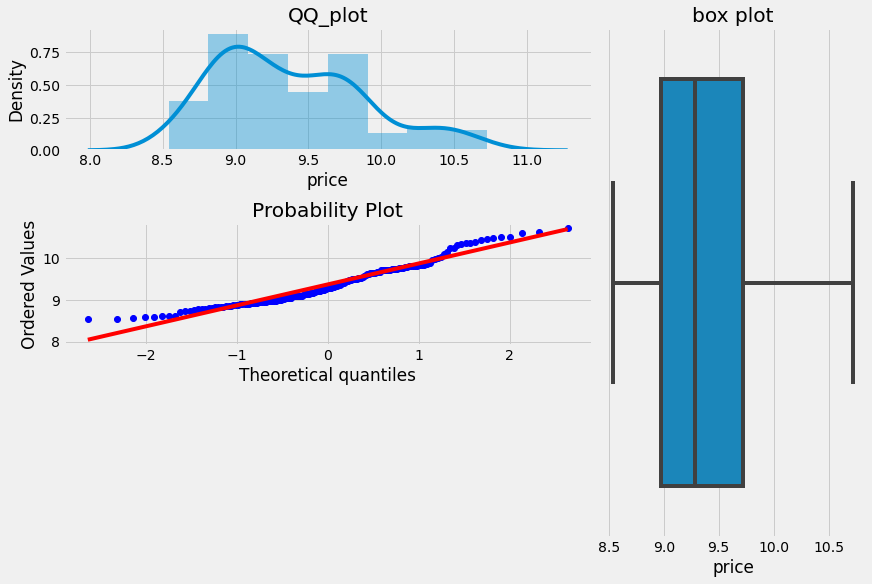

In [15]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig=plt.figure(constrained_layout=True,figsize=(12,8))
grid=gridspec.GridSpec(ncols=3,nrows=3,figure=fig)

ax1=fig.add_subplot(grid[0,:2])
ax1.set_title('Histogram')
sns.distplot(y_train,norm_hist=True,ax=ax1)

ax2=fig.add_subplot(grid[1,:2])
ax1.set_title('QQ_plot')
stats.probplot(y_train,plot=ax2);

ax3=fig.add_subplot(grid[:,2])
ax3.set_title('box plot')
sns.boxplot(y_train,ax=ax3,orient='v')

In [16]:
X['fuel_consumption']=X['citympg']+X['highwaympg']

# <h1>Modeling the data

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [18]:
def cv_rmse(model, x,y):
    rmse = np.sqrt(-cross_val_score(model,x,y, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

In [19]:
cat_cols=X.dtypes[X.dtypes=='object'].index

In [20]:
alpha=np.linspace(0.5,30,50)
pip=Pipeline([
    ('ct',ColumnTransformer([
        ('ss',StandardScaler(),num_cols),
        ('ohe',OneHotEncoder(),['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])
 ])) 
])


In [21]:
lasso=LassoCV(alphas=alpha)
ridge=RidgeCV(alphas=alpha)
elasticnet=ElasticNetCV(alphas=alpha)

In [22]:
x_train_tr=pip.fit_transform(x_train)

In [23]:
lasso.fit(x_train_tr,y_train);
ridge.fit(x_train_tr,y_train);
elasticnet.fit(x_train_tr,y_train);

In [24]:
print('lassocv rmse : ',cv_rmse(lasso,x_train_tr,y_train).mean())
print('ridgecv rmse : ',cv_rmse(ridge,x_train_tr,y_train).mean())
print('elasticnetcv rmse : ',cv_rmse(elasticnet,x_train_tr,y_train).mean())


lassocv rmse :  0.512055180093461
ridgecv rmse :  0.1671018225822537
elasticnetcv rmse :  0.3633504921977189
